<a href="https://colab.research.google.com/github/GeorgeShmelin/Masterschool_projects/blob/main/Car_Dataset_Analysis_Data_Wrangling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Link to the .csv of my cleaned data**

https://drive.google.com/file/d/1-3kdtgXvwOarS6X_UOE-IRL47V_FCx1F/view?usp=drive_link

##**Importing packages**
Python packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# as I forgot Machine Learning - I am not going to use it in this project

##**Data Loading**


In [ ]:
pip install gdown

In [ ]:
import gdown
file_id = "19V7VjHs4J8idTko7NQUT95ZJO2ZQSGWh"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"

In [ ]:
gdown.download(url, output, quiet=False)
df_raw = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=19V7VjHs4J8idTko7NQUT95ZJO2ZQSGWh
To: /content/data.csv
100%|██████████| 1.48M/1.48M [00:00<00:00, 54.7MB/s]


In [ ]:
df_raw.shape

(11914, 16)

In [ ]:
df_raw.sample(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11020,Toyota,Tundra,2017,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,17,13,2031,42330
626,Mazda,5,2013,regular unleaded,157.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Passenger Minivan,28,22,586,22070


##just for a double check - a more tradional way, also works

In [ ]:
url = "https://drive.google.com/uc?id=19V7VjHs4J8idTko7NQUT95ZJO2ZQSGWh"
df1 = pd.read_csv(url)

In [ ]:
df1.shape

(11914, 16)

In [ ]:
df1.sample() # same data, it works

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4232,Suzuki,Esteem,2001,regular unleaded,122.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,32,24,481,13199


##**Understanding the Dataset**

**Basic information**

**List of Columns in Dataframe**

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Missing values**

In [ ]:
df_raw.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [ ]:
df_raw.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,356
Engine Cylinders,9
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,71


In [ ]:
df_raw.duplicated().sum()

715

making df Data from df_raw, the data with whick I am going to work

In [ ]:
df = df_raw.drop_duplicates()

In [ ]:
df.shape

(11199, 16)

In [ ]:
df.sample(5)

,Make,Model,Year,Fuel_Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Doors_number,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market_Category
5423,Volkswagen,Golf R,2017,(unleaded/E85)/gas,292,4,AUTOMATED_MANUAL,all_wheel_drive,4,Compact,4dr Hatchback,30.0,23,873,40475,hatchback
6615,BMW,M5,2015,(unleaded/E85)/gas,560,8,AUTOMATED_MANUAL,rear_drive,4,Large,Sedan,20.0,14,3916,93600,luxury
9684,Mercedes-Benz,SLR McLaren,2009,(unleaded/E85)/gas,617,8,AUTOMATIC,rear_drive,2,Compact,Convertible,16.0,12,617,495000,luxury
5457,Volkswagen,Golf,2016,(unleaded/E85)/gas,170,4,AUTOMATIC,front_drive,2,Compact,2dr Hatchback,36.0,25,873,20675,hatchback
4254,Volkswagen,EuroVan,2002,(unleaded/E85)/gas,201,6,AUTOMATIC,front_drive,3,Large,Passenger Minivan,18.0,15,873,27700,nan


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3376


In [ ]:
df.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,356
Engine Cylinders,9
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,71


In [ ]:
#df.info()

-----------------------------------------------------------------------------

#**Project Tasks**

##**Task_1: Cleaning the Dataset**

###**1.1 Handle Missing Data**

In [ ]:
# as this a quite a limited data,
# I am going to work on each column individually (with big/real data this way more difficult)

### Make: The manufacturer of the car

In [ ]:
df['Make'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Make
Non-Null Count  Dtype 
--------------  ----- 
11199 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Make'].nunique()

48

In [ ]:
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

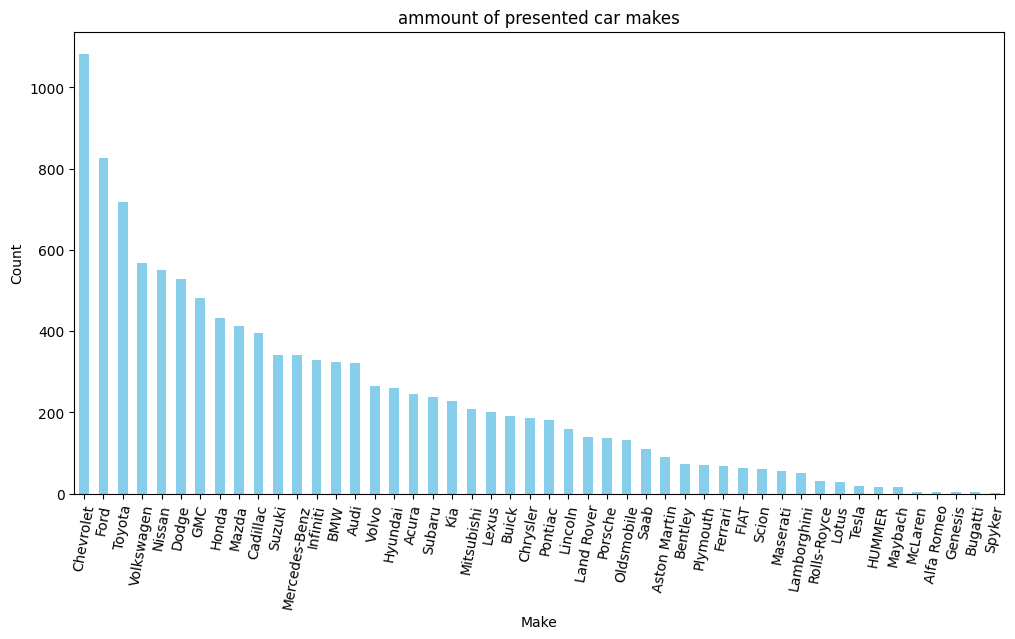

In [ ]:
df['Make'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('ammount of presented car makes')
plt.xticks(rotation=80)
plt.show()

In [ ]:
#so far, so good

###Model: The specific model name of the car.

In [ ]:
df['Model'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Model
Non-Null Count  Dtype 
--------------  ----- 
11199 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Model'].nunique()

915

the graf: (with the graf works too slow, just a double check)

make_model_counts = df.groupby(["Make", "Model"]).size().unstack(fill_value=0)
make_model_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Distribution of Car Makes Colored by Model")
plt.xticks(rotation=75)
plt.legend(title="Model", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# so far, so good

###Year: The production year of the car

In [ ]:
df['Year'].info() # int as I want

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Year
Non-Null Count  Dtype
--------------  -----
11199 non-null  int64
dtypes: int64(1)
memory usage: 175.0 KB


In [ ]:
df['Year'].nunique()

28

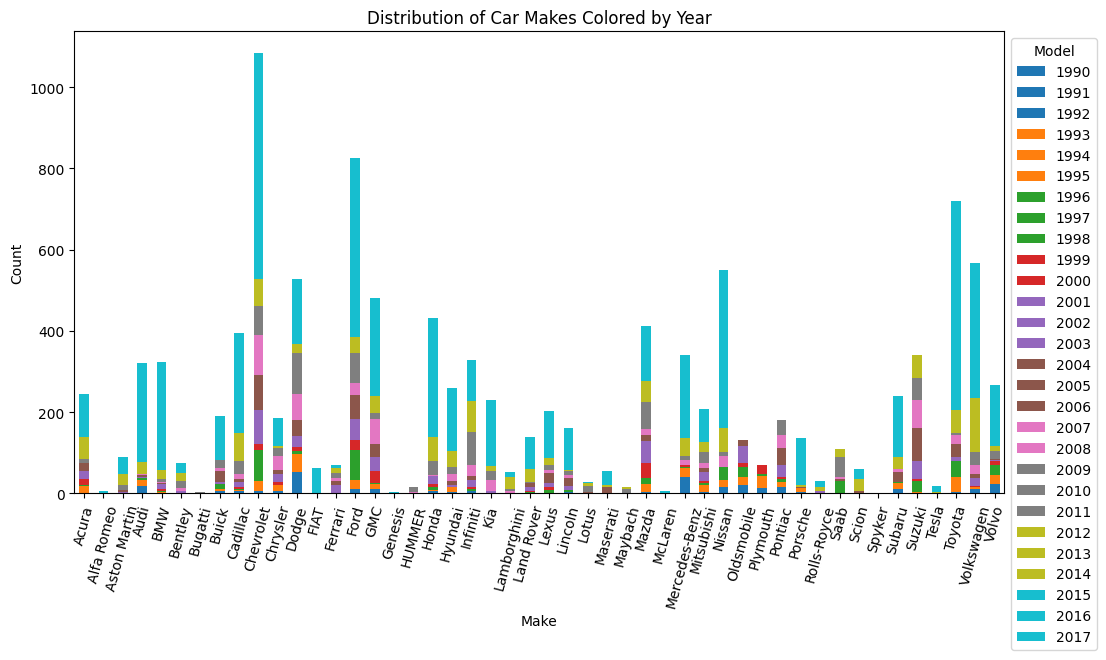

In [ ]:
make_model_counts = df.groupby(["Make", "Year"]).size().unstack(fill_value=0)
make_model_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Distribution of Car Makes Colored by Year")
plt.xticks(rotation=75)
plt.legend(title="Model", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#looks great

###Engine Fuel Type: Type of fuel the car uses

In [ ]:
df['Engine Fuel Type'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Engine Fuel Type
Non-Null Count  Dtype 
--------------  ----- 
11196 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Engine Fuel Type'].nunique()

10

In [ ]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

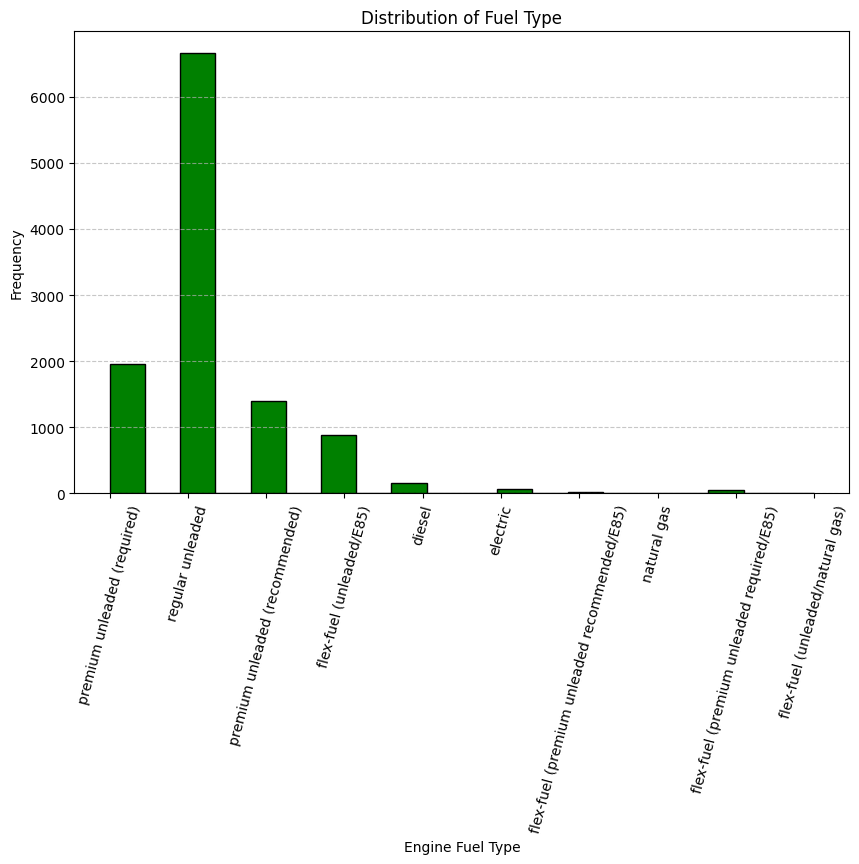

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Engine Fuel Type'].dropna(), bins=20, color='green', edgecolor='black')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Type')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].apply(lambda x:
    'diesel' if 'diesel' in str(x).lower() else
    'electric' if 'electric' in str(x).lower() else
    'premium unleaded (required)' if 'premium_unleaded' in str(x).lower() else
    '(unleaded/E85)/gas')

<ipython-input-40-d3008df2a0e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine Fuel Type'] = df['Engine Fuel Type'].apply(lambda x:


In [ ]:
df['Engine Fuel Type'].unique() # looks better

array(['(unleaded/E85)/gas', 'diesel', 'electric'], dtype=object)

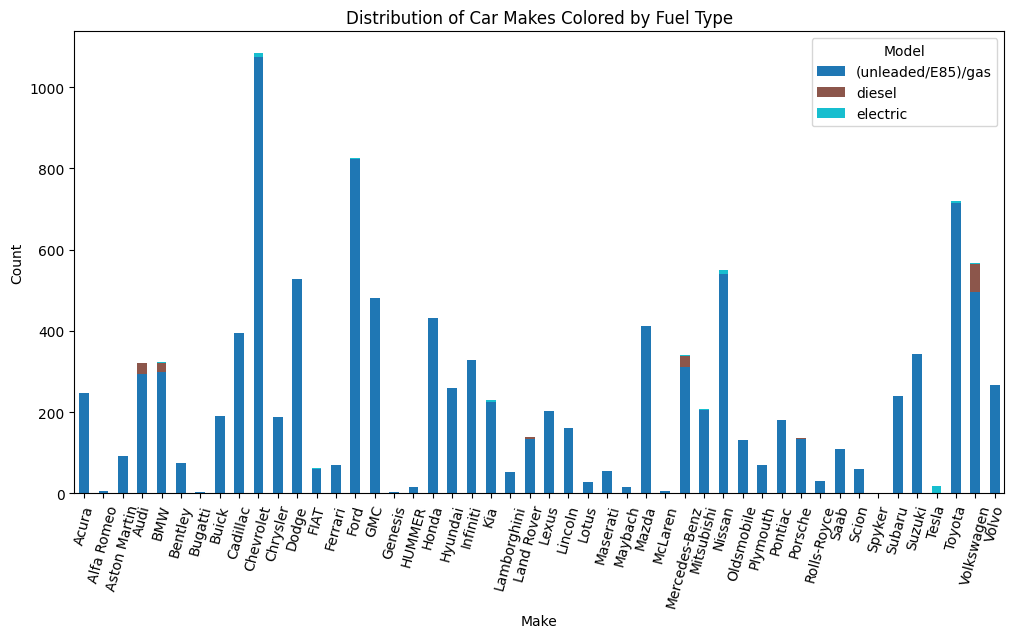

In [ ]:
make_model_counts = df.groupby(["Make", "Engine Fuel Type"]).size().unstack(fill_value=0)
make_model_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Distribution of Car Makes Colored by Fuel Type")
plt.xticks(rotation=75)
plt.legend(title="Model", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
df.rename(columns={'Engine Fuel Type': 'Fuel_Type'}, inplace=True)

<ipython-input-43-8732496cba57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Engine Fuel Type': 'Fuel_Type'}, inplace=True)


In [ ]:
# looks much better

###Engine HP: The horsepower of the car's engine

In [ ]:
df['Engine HP'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Engine HP
Non-Null Count  Dtype  
--------------  -----  
11130 non-null  float64
dtypes: float64(1)
memory usage: 175.0 KB


In [ ]:
df['Engine HP'] = pd.to_numeric(df['Engine HP'], errors='coerce').astype('Int64')

<ipython-input-46-451cdbe63f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine HP'] = pd.to_numeric(df['Engine HP'], errors='coerce').astype('Int64')


In [ ]:
df['Engine HP'].isnull().sum()

69

In [ ]:
df['Engine HP'].fillna(np.nan, inplace=True) # for the moment, I am going to fill isnull by NaN, as later with a better understanding
# of the cars' class and engine, possible to fill it by mean() or median() of that exact category

<ipython-input-48-b2b8ddae24b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine HP'].fillna(np.nan, inplace=True) # for the moment, I am going to fill isnull by NaN, as later with a better understanding
<ipython-input-48-b2b8ddae24b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine HP'].fillna(np.nan, inplace=True) # fo

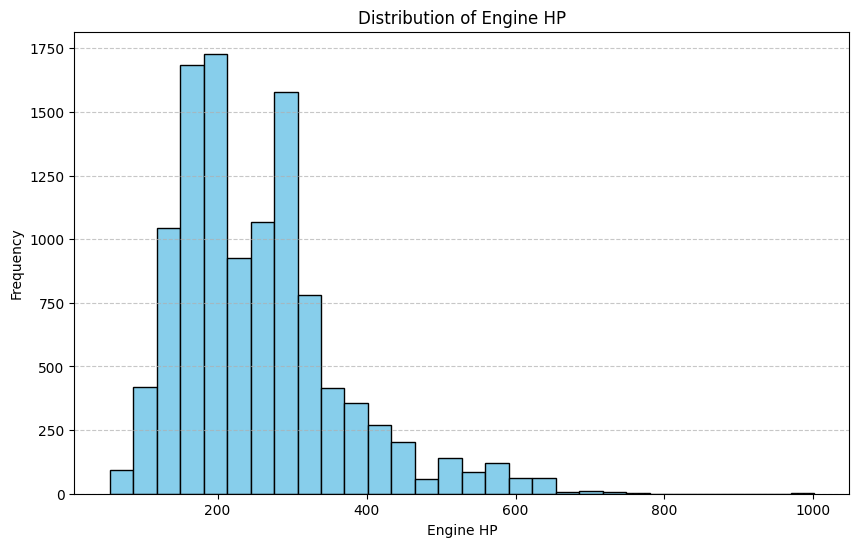

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Engine HP'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Engine HP')
plt.ylabel('Frequency')
plt.title('Distribution of Engine HP')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Engine Cylinders: The number of cylinders in the car's engine

In [ ]:
df['Engine Cylinders'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Engine Cylinders
Non-Null Count  Dtype  
--------------  -----  
11169 non-null  float64
dtypes: float64(1)
memory usage: 175.0 KB


In [ ]:
df['Engine Cylinders'].isnull().sum()

30

In [ ]:
df['Engine Cylinders'] = pd.to_numeric(df['Engine Cylinders'], errors='coerce').astype('Int64')

<ipython-input-52-79d2b685117c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine Cylinders'] = pd.to_numeric(df['Engine Cylinders'], errors='coerce').astype('Int64')


In [ ]:
df['Engine Cylinders'].fillna(np.nan, inplace=True)

<ipython-input-53-b80e52ed7aaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Cylinders'].fillna(np.nan, inplace=True)
<ipython-input-53-b80e52ed7aaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine Cylinders'].fillna(np.nan, inplace=True)


In [ ]:
df['Engine Cylinders'].nunique()

9

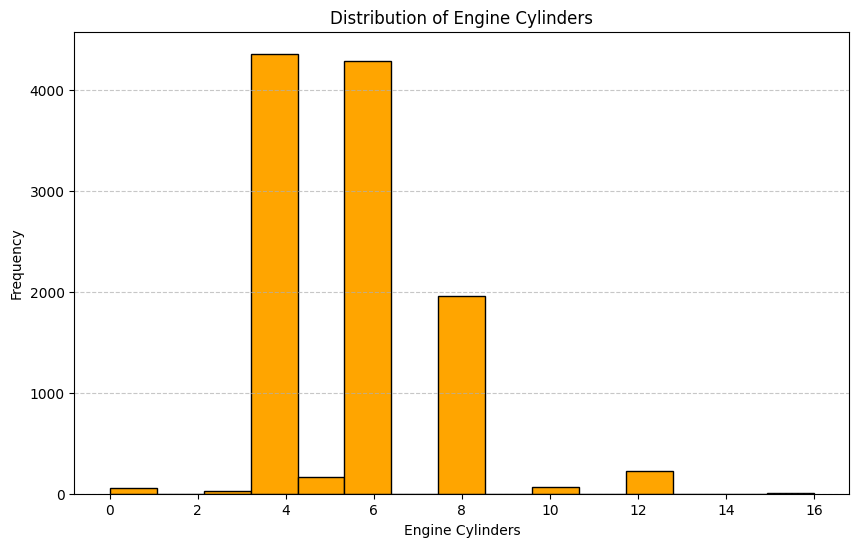

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Engine Cylinders'].dropna(), bins=15, color='orange', edgecolor='black')
plt.xlabel('Engine Cylinders')
plt.ylabel('Frequency')
plt.title('Distribution of Engine Cylinders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# cars with less than 2 cylinders look suspicious

###Transmission Type: The type of transmission in the car

In [ ]:
df.rename(columns={'Transmission Type': 'Transmission'}, inplace=True)

<ipython-input-57-ad8df92573d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Transmission Type': 'Transmission'}, inplace=True)


In [ ]:
df['Transmission'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Transmission
Non-Null Count  Dtype 
--------------  ----- 
11199 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Transmission'] = df['Transmission'].astype('category')
df['Transmission'].unique()

<ipython-input-59-93dd45614a77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission'] = df['Transmission'].astype('category')


['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE', 'UNKNOWN']
Categories (5, object): ['AUTOMATED_MANUAL', 'AUTOMATIC', 'DIRECT_DRIVE', 'MANUAL', 'UNKNOWN']

In [ ]:
df['Transmission'] = df['Transmission'].replace('UNKNOWN', np.nan)

<ipython-input-60-912e4e4b6866>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Transmission'] = df['Transmission'].replace('UNKNOWN', np.nan)
<ipython-input-60-912e4e4b6866>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission'] = df['Transmission'].replace('UNKNOWN', np.nan)


In [ ]:
df['Transmission'].isnull().sum()

12

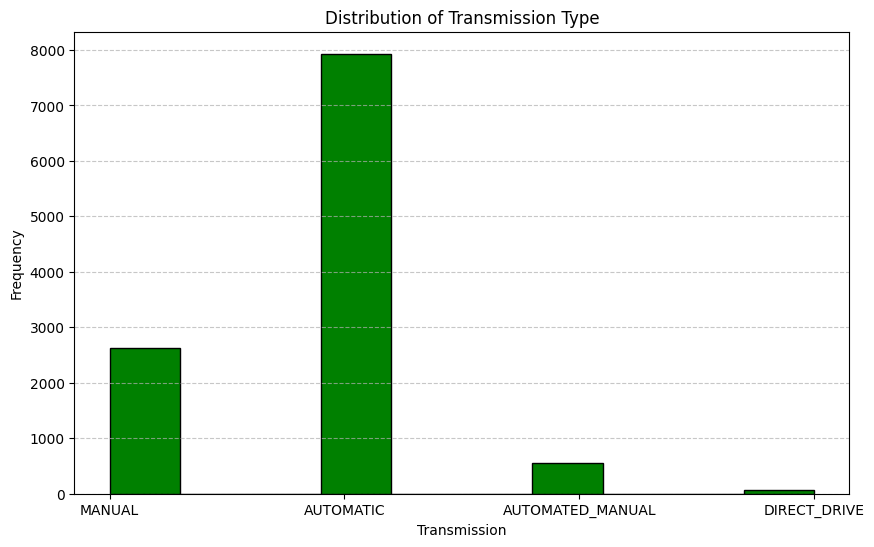

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Transmission'].dropna(), bins=10, color='green', edgecolor='black')
plt.xlabel('Transmission')
plt.ylabel('Frequency')
plt.title('Distribution of Transmission Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Driven_Wheels: The type of drivetrain

In [ ]:
df['Driven_Wheels'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Driven_Wheels
Non-Null Count  Dtype 
--------------  ----- 
11199 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Driven_Wheels'] = df['Driven_Wheels'].astype('category')

<ipython-input-64-2ea99fa5baab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Driven_Wheels'] = df['Driven_Wheels'].astype('category')


In [ ]:
df['Driven_Wheels'].isnull().sum()

0

In [ ]:
df['Driven_Wheels'].nunique()

4

In [ ]:
df['Driven_Wheels'].unique()

['rear wheel drive', 'front wheel drive', 'all wheel drive', 'four wheel drive']
Categories (4, object): ['all wheel drive', 'four wheel drive', 'front wheel drive',
                         'rear wheel drive']

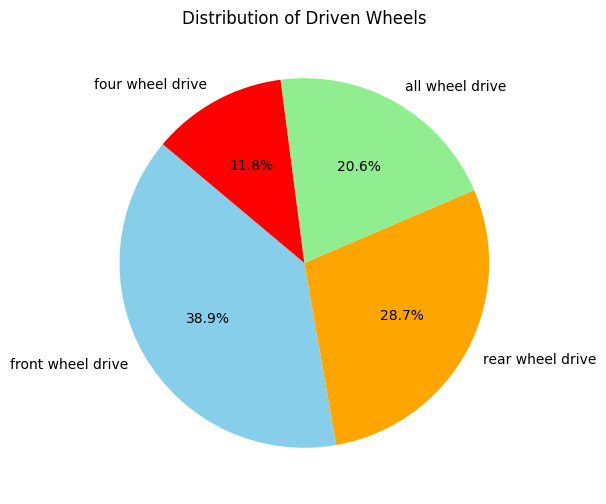

In [ ]:
driven_wheels_counts = df['Driven_Wheels'].dropna().value_counts()
plt.figure(figsize=(8, 6))
plt.pie(driven_wheels_counts, labels=driven_wheels_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'orange', 'lightgreen', 'red'], startangle=140)
plt.title('Distribution of Driven Wheels')
plt.show()

In [ ]:
df['Driven_Wheels'] = df['Driven_Wheels'].replace({
    'rear wheel drive': 'rear_drive',
    'front wheel drive': 'front_drive',
    'all wheel drive': 'all_wheel_drive',
    'four wheel drive': 'all_wheel_drive'
})

<ipython-input-69-58fb47ba3fa0>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Driven_Wheels'] = df['Driven_Wheels'].replace({
<ipython-input-69-58fb47ba3fa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Driven_Wheels'] = df['Driven_Wheels'].replace({


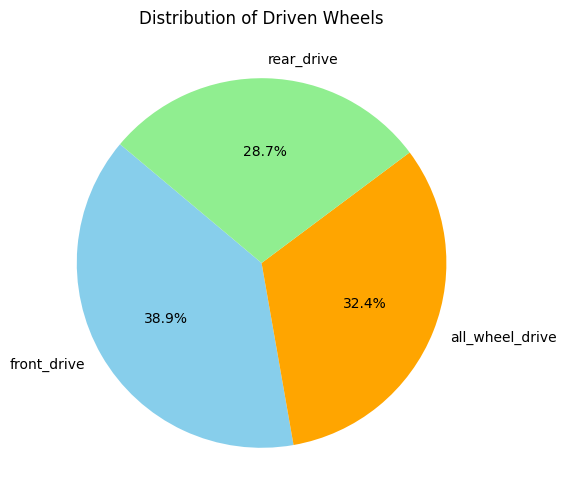

In [ ]:
driven_wheels_counts = df['Driven_Wheels'].dropna().value_counts()
plt.figure(figsize=(8, 6))
plt.pie(driven_wheels_counts, labels=driven_wheels_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'orange', 'lightgreen', 'red'], startangle=140)
plt.title('Distribution of Driven Wheels')
plt.show()

In [ ]:
df['Driven_Wheels'].nunique()

3

###Number of Doors: Number of doors the car has

In [ ]:
df.rename(columns={'Number of Doors': 'Doors_number'}, inplace=True)

<ipython-input-72-f087d6e1c33e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Number of Doors': 'Doors_number'}, inplace=True)


In [ ]:
df['Doors_number'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Doors_number
Non-Null Count  Dtype  
--------------  -----  
11193 non-null  float64
dtypes: float64(1)
memory usage: 175.0 KB


In [ ]:
df['Doors_number'].nunique()

3

In [ ]:
df['Doors_number'].unique()

array([ 2.,  4.,  3., nan])

In [ ]:
df['Doors_number'] = pd.to_numeric(df['Doors_number'], errors='coerce').astype('Int64')
df['Doors_number'].isnull().sum()

<ipython-input-76-99f7d8156a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Doors_number'] = pd.to_numeric(df['Doors_number'], errors='coerce').astype('Int64')


6

<ipython-input-77-4ad831c31e30>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Doors_number'], y=df['Engine HP'], ax=axes[1], palette='coolwarm')


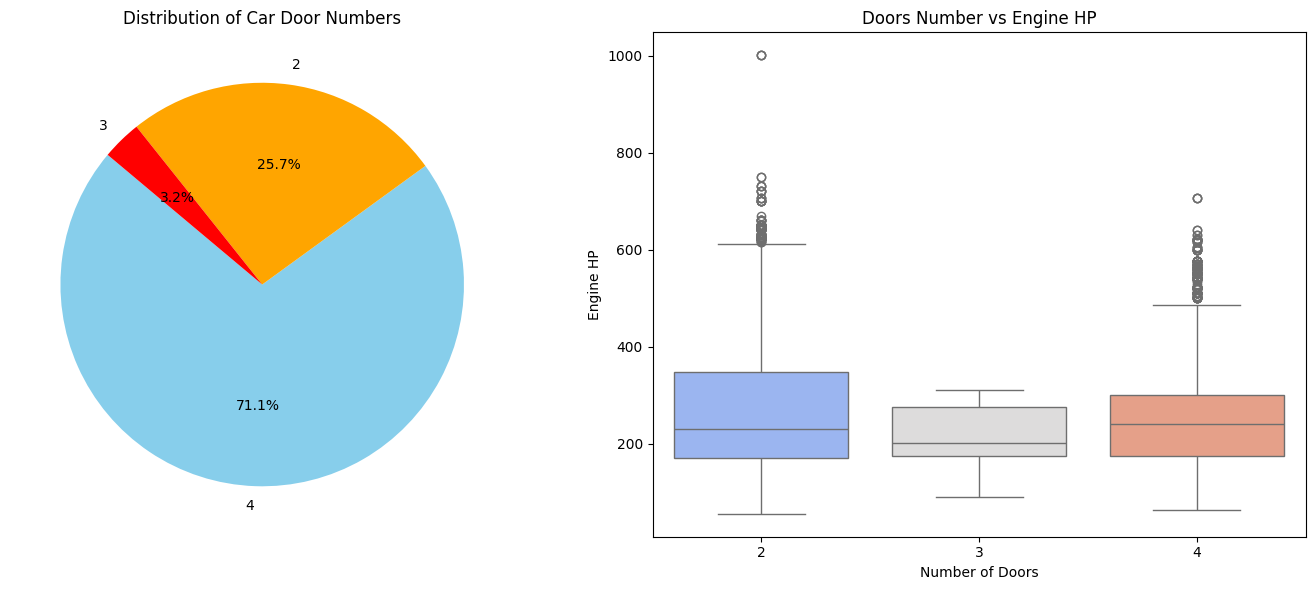

In [ ]:
doors_counts = df['Doors_number'].dropna().value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(doors_counts, labels=doors_counts.index, autopct='%1.1f%%',
            colors=['skyblue', 'orange', 'red', 'grey'], startangle=140)
axes[0].set_title('Distribution of Car Door Numbers')

sns.boxplot(x=df['Doors_number'], y=df['Engine HP'], ax=axes[1], palette='coolwarm')
axes[1].set_xlabel('Number of Doors')
axes[1].set_ylabel('Engine HP')
axes[1].set_title('Doors Number vs Engine HP')

plt.tight_layout()
plt.show()

###Market Category: The market segment the car belongs to

In [ ]:
df['Market Category'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Market Category
Non-Null Count  Dtype 
--------------  ----- 
7823 non-null   object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Market Category'].nunique()

71

In [ ]:
df['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

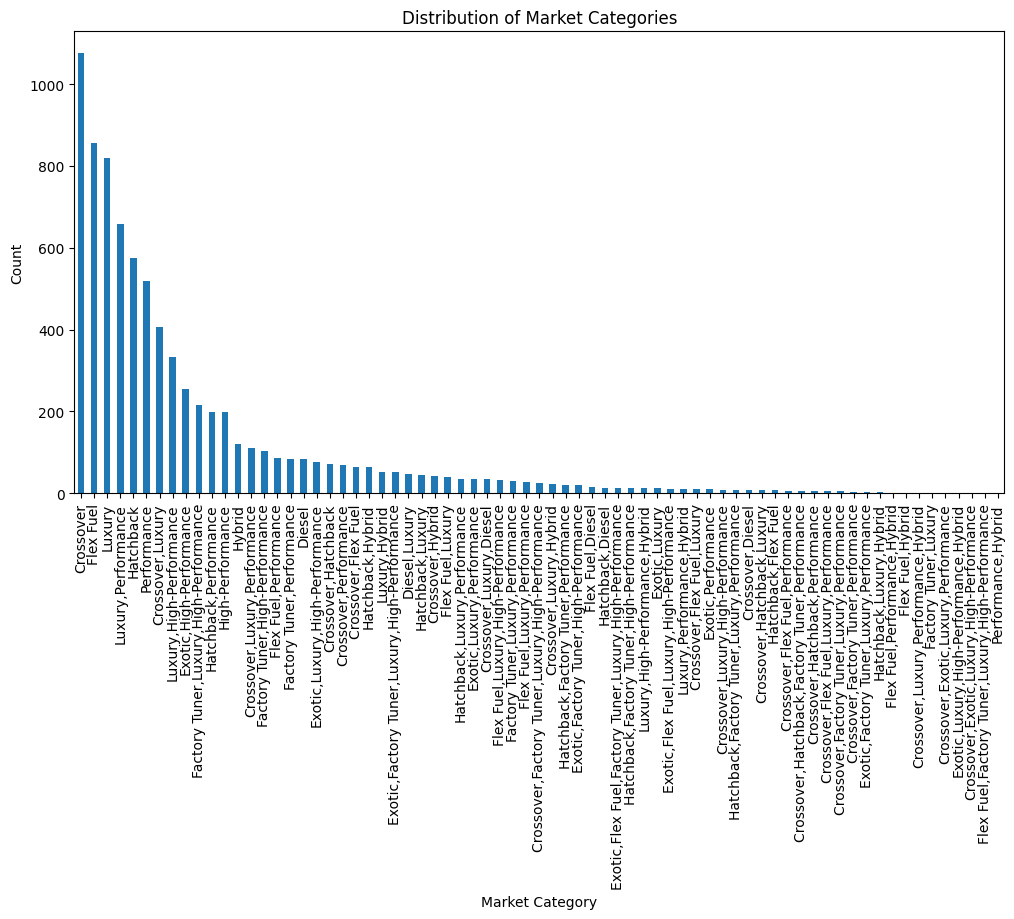

In [ ]:
plt.figure(figsize=(12, 6))
df['Market Category'].value_counts().plot(kind='bar')
plt.xlabel('Market Category')
plt.ylabel('Count')
plt.title('Distribution of Market Categories')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Market_Category'] = df['Market Category'].astype(str).str.lower().apply(
    lambda x: ('luxury' if 'luxury' in x else
               'flex fuel' if 'flex fuel' in x else
               'hatchback' if 'hatchback' in x else
               'hybrid' if 'hybrid' in x else
               'diesel' if 'diesel' in x else
               'exotic' if 'exotic' in x else
               'crossover' if 'crossover' in x else
               x)  # Keeps the original value if no match is found
)

<ipython-input-82-1622c499155b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Market_Category'] = df['Market Category'].astype(str).str.lower().apply(


In [ ]:
df.drop(columns=['Market Category'], inplace=True)

<ipython-input-83-5851a6c3c643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Market Category'], inplace=True)


In [ ]:
df['Market_Category'].unique()

array(['luxury', 'performance', 'flex fuel', 'nan', 'hatchback',
       'high-performance', 'factory tuner,high-performance', 'exotic',
       'factory tuner,performance', 'crossover', 'hybrid', 'diesel'],
      dtype=object)

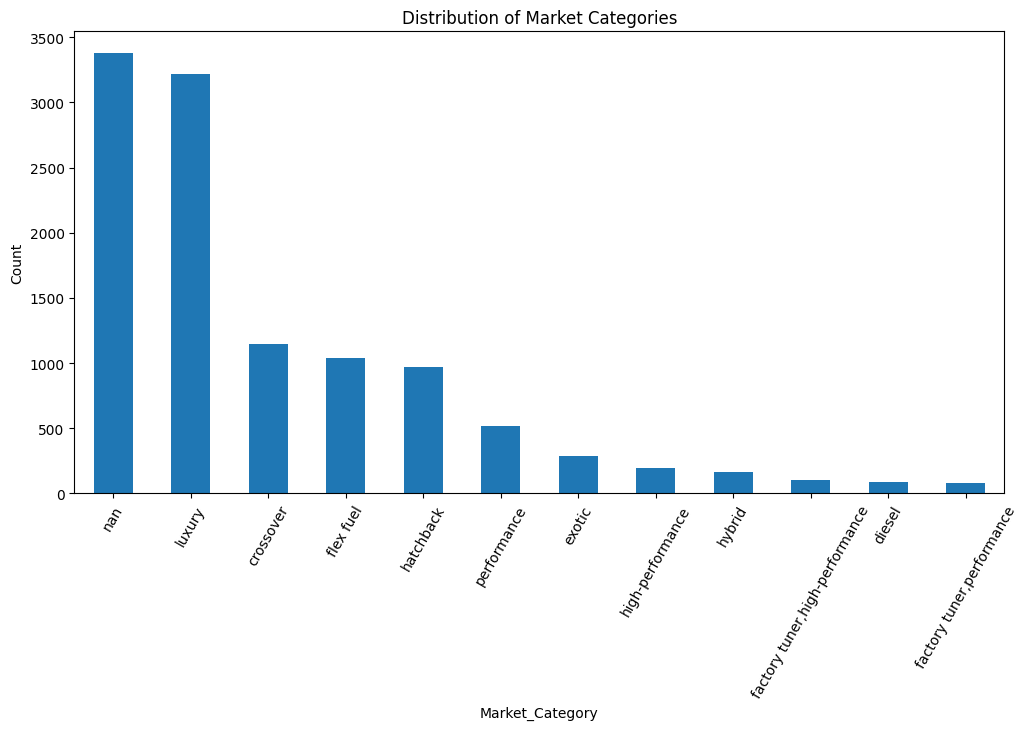

In [ ]:
plt.figure(figsize=(12, 6))
df['Market_Category'].value_counts().plot(kind='bar')
plt.xlabel('Market_Category')
plt.ylabel('Count')
plt.title('Distribution of Market Categories')
plt.xticks(rotation=60)
plt.show()

In [ ]:
# not ideal, but much better

###Vehicle Size: The size category of the car

In [ ]:
df['Vehicle Size'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Vehicle Size
Non-Null Count  Dtype 
--------------  ----- 
11199 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Vehicle Size'].nunique()

3

In [ ]:
df['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

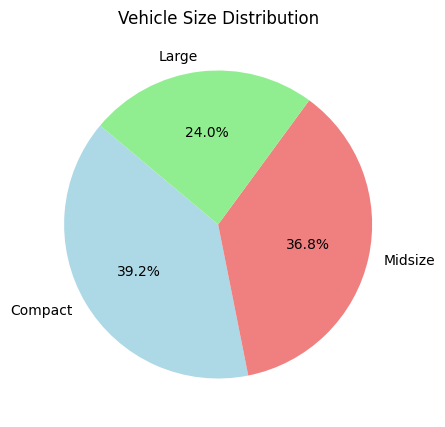

In [ ]:
size_counts = df['Vehicle Size'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Vehicle Size Distribution')
plt.show()

In [ ]:
# looks good

###Vehicle Style: The style of the vehicle

In [ ]:
df['Vehicle Style'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Vehicle Style
Non-Null Count  Dtype 
--------------  ----- 
11199 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [ ]:
df['Vehicle Style'].nunique()

16

In [ ]:
df['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

Text(0, 0.5, 'Count')

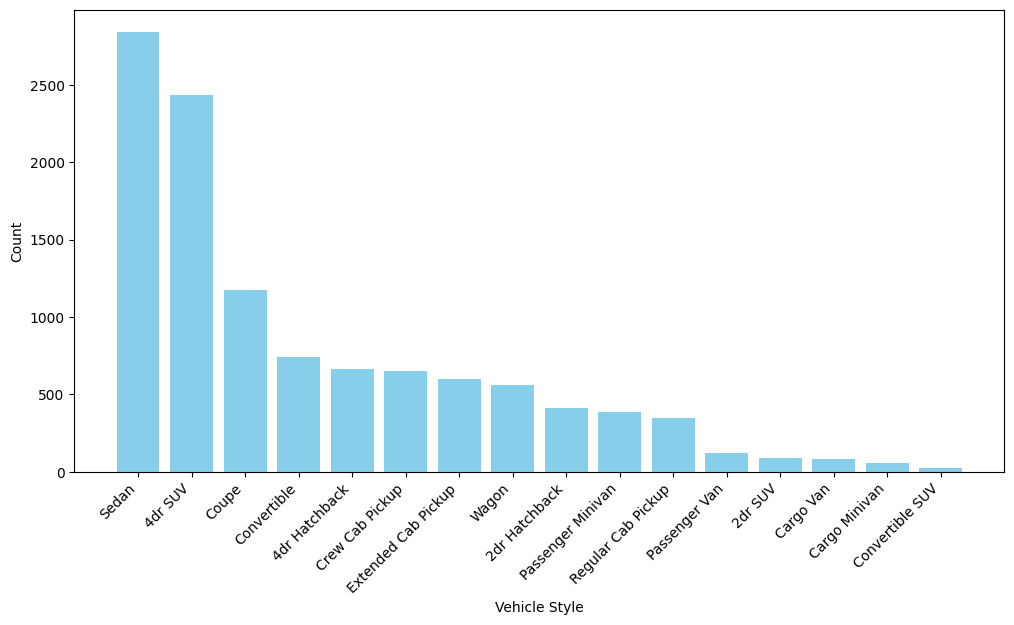

In [ ]:
style_counts = df['Vehicle Style'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(style_counts.index, style_counts.values, color='skyblue')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Vehicle Style')
plt.ylabel('Count')

In [ ]:
# not ideal, but for the time being I should leave it as it is

###highway MPG: The estimated miles per gallon on the highway

In [ ]:
df['highway MPG'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: highway MPG
Non-Null Count  Dtype
--------------  -----
11199 non-null  int64
dtypes: int64(1)
memory usage: 175.0 KB


In [ ]:
df['highway MPG'].nunique()

59

###city mpg: The estimated miles per gallon in the city.

In [ ]:
df['city mpg'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: city mpg
Non-Null Count  Dtype
--------------  -----
11199 non-null  int64
dtypes: int64(1)
memory usage: 175.0 KB


In [ ]:
df['city mpg'].nunique()

69

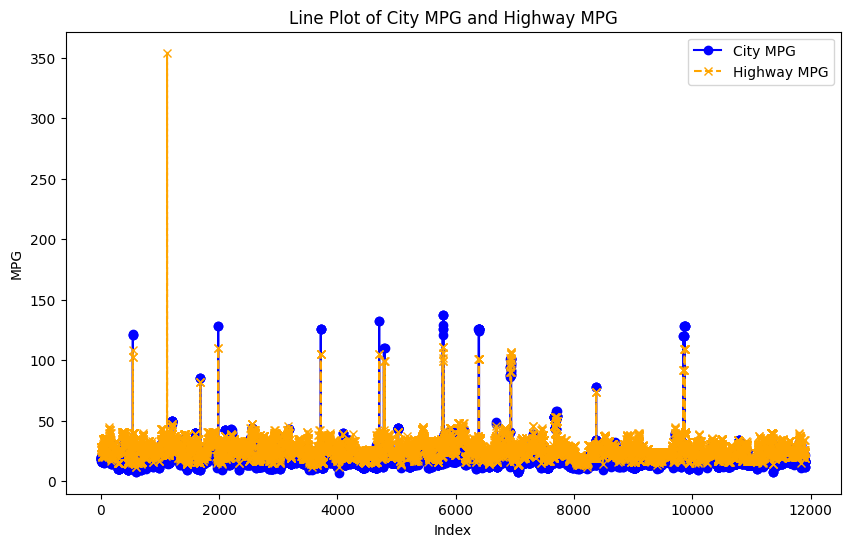

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df['city mpg'], label='City MPG', color='blue', linestyle='-', marker='o') # Changed 'city MPG' to 'city mpg'
plt.plot(df['highway MPG'], label='Highway MPG', color='orange', linestyle='--', marker='x')

plt.xlabel('Index')
plt.ylabel('MPG')
plt.title('Line Plot of City MPG and Highway MPG')
plt.legend()

plt.show()

In [ ]:
#this df['highway MPG'] > 350 looks quite suspicious, I should put here nan value

In [ ]:
df[df['highway MPG'] > 150]

,Make,Model,Year,Fuel_Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Doors_number,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market_Category
1119,Audi,A6,2017,(unleaded/E85)/gas,252,4,AUTOMATED_MANUAL,front_drive,4,Midsize,Sedan,354,24,3105,51600,luxury


In [ ]:
df.loc[df['highway MPG'] > 150, 'highway MPG'] = np.nan

In [ ]:
df['highway MPG'].max()

111.0

In [ ]:
#looks better

###Popularity: A numerical value indicating how popular the car is in the market

In [ ]:
df['Popularity'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: Popularity
Non-Null Count  Dtype
--------------  -----
11199 non-null  int64
dtypes: int64(1)
memory usage: 175.0 KB


In [ ]:
df['Popularity'].nunique()

48

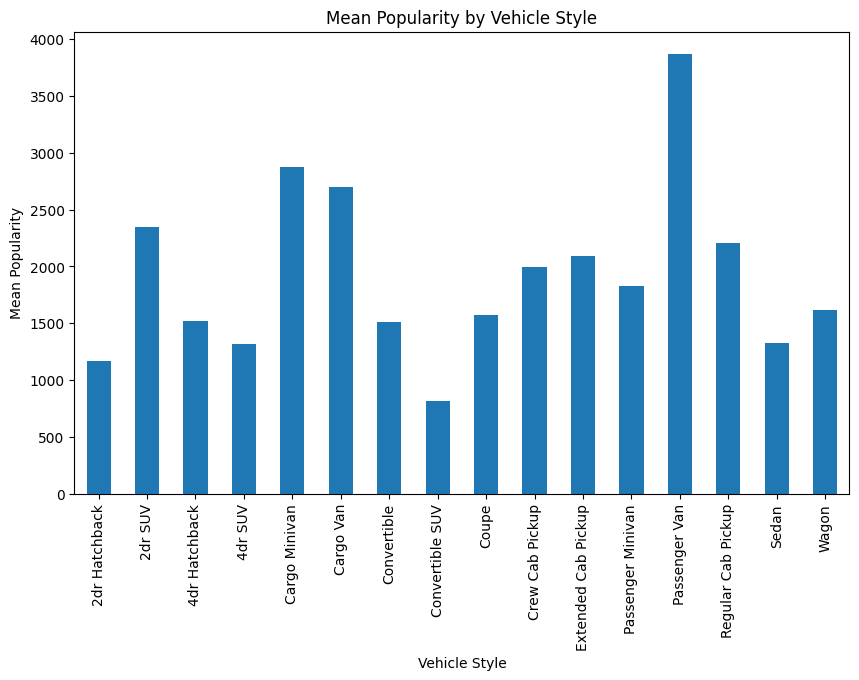

In [ ]:
mean_popularity = df.groupby('Vehicle Style')['Popularity'].mean()
mean_popularity.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Vehicle Style')
plt.show()

In [ ]:
# looks good

###MSRP: The Manufacturer's Suggested Retail Price of the car

In [ ]:
df['MSRP'].info()

<class 'pandas.core.series.Series'>
Index: 11199 entries, 0 to 11913
Series name: MSRP
Non-Null Count  Dtype
--------------  -----
11199 non-null  int64
dtypes: int64(1)
memory usage: 175.0 KB


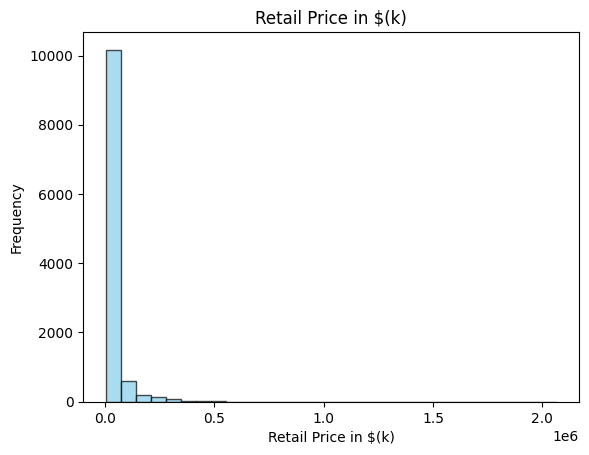

In [ ]:
plt.hist(df['MSRP'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Retail Price in $(k)')
plt.ylabel('Frequency')
plt.title('Retail Price in $(k)')
plt.show()

In [ ]:
# df['MSRP'] contains extreme outliers

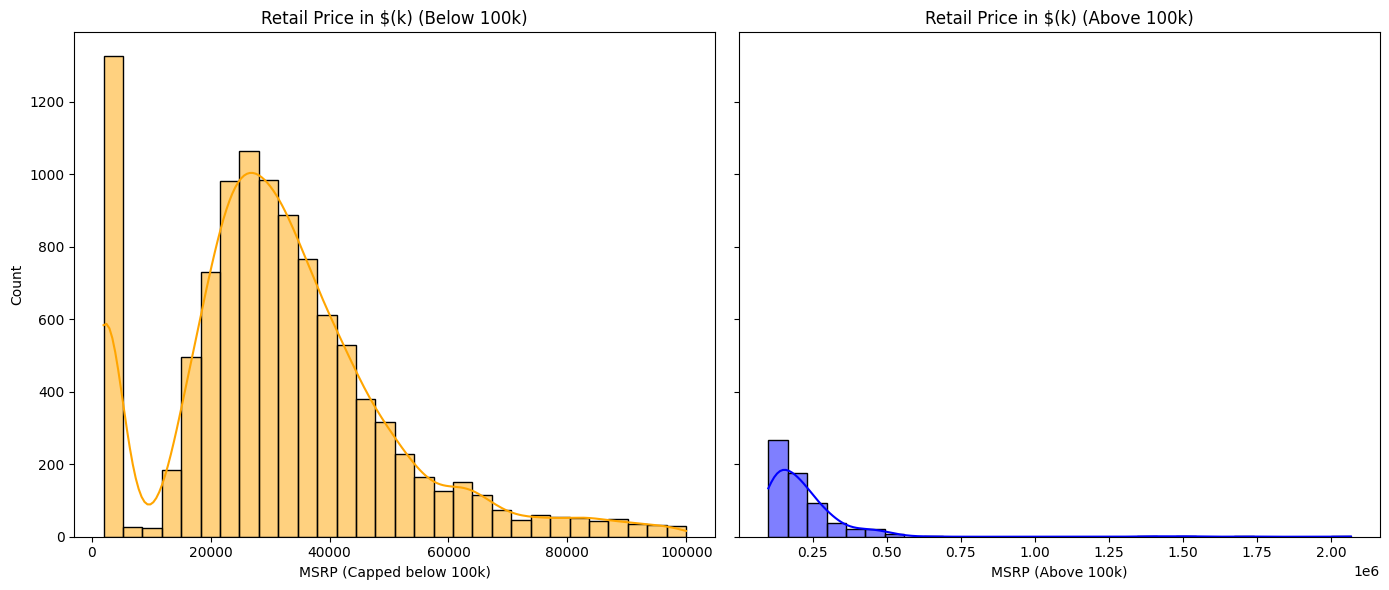

In [ ]:
below_100k = df['MSRP'][df['MSRP'] < 100000]
above_100k = df['MSRP'][df['MSRP'] > 100000]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(below_100k, bins=30, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Retail Price in $(k) (Below 100k)')
axes[0].set_xlabel('MSRP (Capped below 100k)')

sns.histplot(above_100k, bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Retail Price in $(k) (Above 100k)')
axes[1].set_xlabel('MSRP (Above 100k)')

plt.tight_layout()
plt.show()

In [ ]:
df.duplicated().sum()

18

In [ ]:
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(11181, 16)

In [ ]:
df.sample(5)

,Make,Model,Year,Fuel_Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Doors_number,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market_Category
10286,Ford,Taurus,2015,(unleaded/E85)/gas,365,6,AUTOMATIC,all_wheel_drive,4,Large,Sedan,25.0,17,5657,40220,"factory tuner,high-performance"
7872,Infiniti,Q70,2016,(unleaded/E85)/gas,330,6,AUTOMATIC,rear_drive,4,Large,Sedan,26.0,18,190,49850,luxury
10298,Ford,Taurus,2017,(unleaded/E85)/gas,365,6,AUTOMATIC,all_wheel_drive,4,Large,Sedan,24.0,16,5657,42520,"factory tuner,high-performance"
8589,Nissan,Rogue,2017,(unleaded/E85)/gas,170,4,AUTOMATIC,all_wheel_drive,4,Midsize,4dr SUV,32.0,25,2009,25170,crossover
8778,Chevrolet,S-10,2003,(unleaded/E85)/gas,120,4,MANUAL,rear_drive,2,Compact,Regular Cab Pickup,25.0,19,1385,14770,flex fuel


# here I could consider the data pre-cleaned

----------------------------------------------------------------------

# **1. Data Cleaning**
Handle Missing Data:

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Make              11181 non-null  object  
 1   Model             11181 non-null  object  
 2   Year              11181 non-null  int64   
 3   Fuel_Type         11181 non-null  object  
 4   Engine HP         11112 non-null  Int64   
 5   Engine Cylinders  11151 non-null  Int64   
 6   Transmission      11169 non-null  category
 7   Driven_Wheels     11181 non-null  category
 8   Doors_number      11175 non-null  Int64   
 9   Vehicle Size      11181 non-null  object  
 10  Vehicle Style     11181 non-null  object  
 11  highway MPG       11180 non-null  float64 
 12  city mpg          11181 non-null  int64   
 13  Popularity        11181 non-null  int64   
 14  MSRP              11181 non-null  int64   
 15  Market_Category   11181 non-null  object  
dtypes: Int64(3), category(2), f

In [ ]:
df_cleaned['Fuel_Type'] = df_cleaned['Fuel_Type'].astype('category')
print(df_cleaned['Fuel_Type'].dtype)

category


<ipython-input-119-c0f61d73e620>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Fuel_Type'] = df_cleaned['Fuel_Type'].astype('category')


In [ ]:
df_cleaned.nunique()

,0
Make,48
Model,915
Year,28
Fuel_Type,3
Engine HP,356
Engine Cylinders,9
Transmission,4
Driven_Wheels,3
Doors_number,3
Vehicle Size,3


In [ ]:
df_cleaned['highway MPG'] = df_cleaned['highway MPG'].fillna(0).astype(int)
print(df_cleaned['highway MPG'].dtype)

int64


<ipython-input-121-42f277efc1b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['highway MPG'] = df_cleaned['highway MPG'].fillna(0).astype(int)


In [ ]:
# also
df_cleaned['Vehicle Size'] = df_cleaned['Vehicle Size'].astype('category')
df_cleaned['Doors_number'] = df_cleaned['Doors_number'].astype('category')
print(df_cleaned['Vehicle Size'].dtype)
print(df_cleaned['Doors_number'].dtype)

category
category


<ipython-input-122-0f4602461edf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Vehicle Size'] = df_cleaned['Vehicle Size'].astype('category')
<ipython-input-122-0f4602461edf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Doors_number'] = df_cleaned['Doors_number'].astype('category')


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Make              11181 non-null  object  
 1   Model             11181 non-null  object  
 2   Year              11181 non-null  int64   
 3   Fuel_Type         11181 non-null  category
 4   Engine HP         11112 non-null  Int64   
 5   Engine Cylinders  11151 non-null  Int64   
 6   Transmission      11169 non-null  category
 7   Driven_Wheels     11181 non-null  category
 8   Doors_number      11175 non-null  category
 9   Vehicle Size      11181 non-null  category
 10  Vehicle Style     11181 non-null  object  
 11  highway MPG       11181 non-null  int64   
 12  city mpg          11181 non-null  int64   
 13  Popularity        11181 non-null  int64   
 14  MSRP              11181 non-null  int64   
 15  Market_Category   11181 non-null  object  
dtypes: Int64(2), category(5), i

In [ ]:
# now the data looks more reasonable

## isnull

In [ ]:
df_pre_cleaned = df_cleaned

In [ ]:
df_pre_cleaned.isnull().sum()

,0
Make,0
Model,0
Year,0
Fuel_Type,0
Engine HP,69
Engine Cylinders,30
Transmission,12
Driven_Wheels,0
Doors_number,6
Vehicle Size,0


### df_cleaned['Engine Cylinders'] == nan

In [ ]:
median_value = df_cleaned['Engine Cylinders'].median()
df_cleaned.loc[df_cleaned['Engine Cylinders'].isna() & (df_cleaned['Fuel_Type'] != 'electric'), 'Engine Cylinders'] = median_value

In [ ]:
# in case of 'electric'

In [ ]:
df_cleaned.loc[df_cleaned['Engine Cylinders'].isna() & (df_cleaned['Fuel_Type'] == 'electric'), 'Engine Cylinders'] = 0

###df_cleaned['Doors_number'] == nan

In [ ]:
#df_cleaned[df_cleaned['Doors_number'].isna()]

In [ ]:
def fill_mode(group):
    return group.fillna(group.mode()[0] if not group.mode().empty else np.nan)

df_cleaned['Doors_number'] = df_cleaned.groupby(['Vehicle Style','Model'])['Doors_number'].transform(fill_mode)

<ipython-input-131-52da8d3db267>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Doors_number'] = df_cleaned.groupby(['Vehicle Style','Model'])['Doors_number'].transform(fill_mode)


### df_cleaned['Transmission'] == nan

In [ ]:
df_cleaned['Transmission'] = df_cleaned.groupby(['Vehicle Style','Model'])['Transmission'].transform(fill_mode)

<ipython-input-132-3abda8b05428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Transmission'] = df_cleaned.groupby(['Vehicle Style','Model'])['Transmission'].transform(fill_mode)


In [ ]:
# in the case of df_cleaned['Transmission'] is a significant compromise, but simply drop the rows should be equally bad

###df_cleaned['Engine HP'] == nan

In [ ]:
def fill_mean(group):
    mean_val = group.mean() if not group.empty else np.nan
    return group.fillna(int(mean_val) if not pd.isna(mean_val) else mean_val)

df_cleaned['Engine HP'] = df_cleaned.groupby(['Vehicle Style', 'Make', 'Year', 'Engine Cylinders','Driven_Wheels', 'Fuel_Type'])['Engine HP'].transform(fill_mean)

<ipython-input-134-846e63c839d2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned['Engine HP'] = df_cleaned.groupby(['Vehicle Style', 'Make', 'Year', 'Engine Cylinders','Driven_Wheels', 'Fuel_Type'])['Engine HP'].transform(fill_mean)
<ipython-input-134-846e63c839d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Engine HP'] = df_cleaned.groupby(['Vehicle Style', 'Make', 'Year', 'Engine Cylinders','Driven_Wheels', 'Fuel_Type'])['Engine HP'].transform(fill_mean)


In [ ]:
df_cleaned.isnull().sum()

,0
Make,0
Model,0
Year,0
Fuel_Type,0
Engine HP,50
Engine Cylinders,0
Transmission,0
Driven_Wheels,0
Doors_number,0
Vehicle Size,0


In [ ]:
# also, as I have quite limited number 'nan' values, may it should be the best option, just
df_cleaned = df_cleaned.dropna()

In [ ]:
df_cleaned.isnull().sum()

,0
Make,0
Model,0
Year,0
Fuel_Type,0
Engine HP,0
Engine Cylinders,0
Transmission,0
Driven_Wheels,0
Doors_number,0
Vehicle Size,0


In [ ]:
df_cleaned.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Year,11131.0,2010.699578,7.240084,1990.0,2007.0,2015.0,2016.0,2017.0
Engine HP,11131.0,253.241039,109.949055,55.0,172.0,239.0,303.0,1001.0
Engine Cylinders,11131.0,5.68152,1.771137,0.0,4.0,6.0,6.0,16.0
highway MPG,11131.0,26.308867,7.134632,0.0,22.0,25.0,30.0,111.0
city mpg,11131.0,19.390082,7.219198,7.0,16.0,18.0,22.0,137.0
Popularity,11131.0,1554.112299,1441.44922,2.0,549.0,1385.0,2009.0,5657.0
MSRP,11131.0,41830.923816,61648.973138,2000.0,21580.0,30600.0,42940.0,2065902.0


In [ ]:
df_cleaned['Engine HP'].max()

1001

In [ ]:
df_cleaned[df_cleaned['Engine HP'] > 900] # looks strange, but the data is from US cars, also 'Bugatti'
# in addition, df_cleaned['city mpg'] shoud be > df_cleaned['highway MPG']

,Make,Model,Year,Fuel_Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Doors_number,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market_Category
11362,Bugatti,Veyron 16.4,2008,(unleaded/E85)/gas,1001,16,AUTOMATED_MANUAL,all_wheel_drive,2,Compact,Coupe,14,8,820,2065902,exotic
11363,Bugatti,Veyron 16.4,2008,(unleaded/E85)/gas,1001,16,AUTOMATED_MANUAL,all_wheel_drive,2,Compact,Coupe,14,8,820,1500000,exotic
11364,Bugatti,Veyron 16.4,2009,(unleaded/E85)/gas,1001,16,AUTOMATED_MANUAL,all_wheel_drive,2,Compact,Coupe,14,8,820,1705769,exotic


# **1.2 Data Type Conversion**

In [ ]:
df_cleaned['Year'].dtype # looks good 'int' (above and below some columns were transformed from 'string' into 'category')

dtype('int64')

#**1.3 Filtering Data**

###Filter the dataset to only include cars from the year 1995 and later

In [ ]:
df_cleaned_after1995 = df_cleaned[df_cleaned['Year'] >= 1995]

In [ ]:
df_cleaned['Year'].min()

1990

In [ ]:
df_cleaned_after1995['Year'].min()

1995

In [ ]:
df_cleaned_after1995.shape

(10536, 16)

**just to check cars older than 1995**

In [ ]:
df_cleaned_before1995 = df_cleaned[df_cleaned['Year'] < 1995]
df_cleaned_before1995.shape

(595, 16)

In [ ]:
df_cleaned_before1995.sample()

,Make,Model,Year,Fuel_Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Doors_number,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market_Category
1368,Cadillac,Allante,1992,(unleaded/E85)/gas,200,8,AUTOMATIC,front_drive,2,Compact,Convertible,20,14,1624,2234,luxury


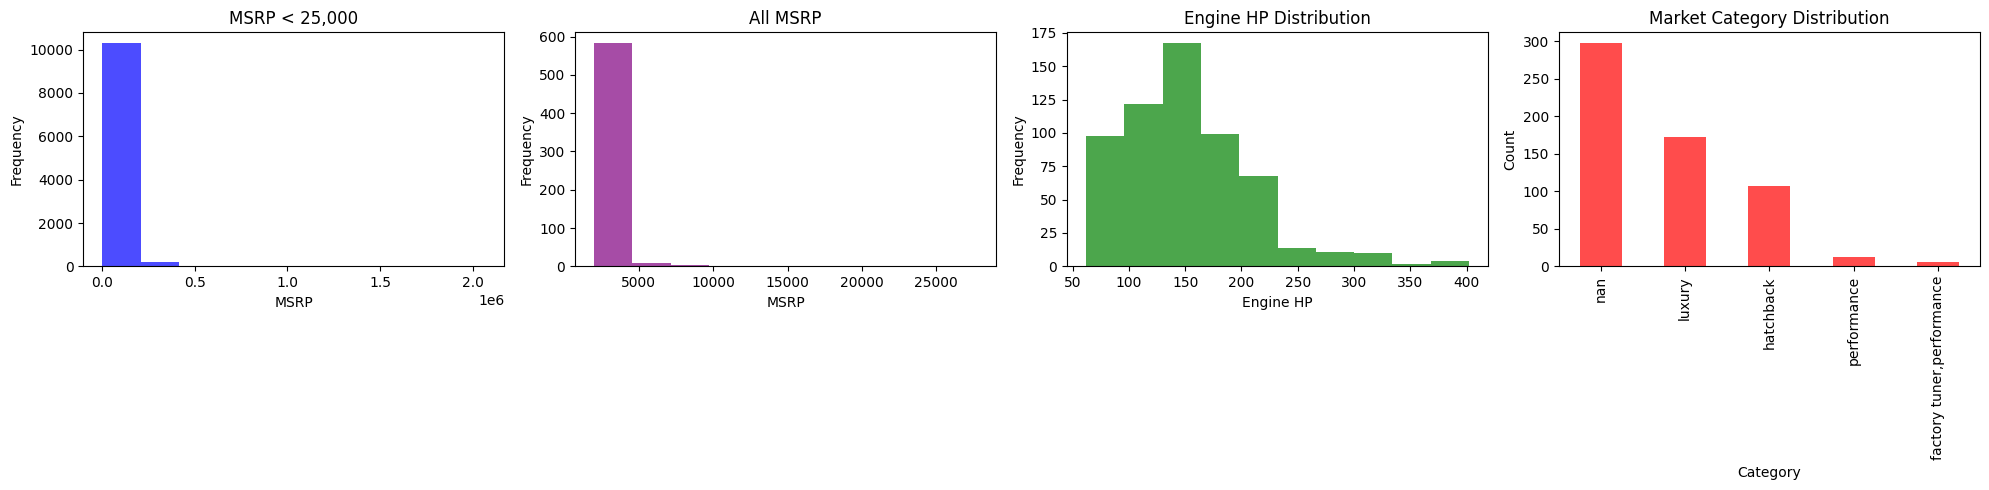

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].hist(df_cleaned_after1995['MSRP'], bins=10, color='blue', alpha=0.7)

axes[0].set_title('MSRP < 25,000')
axes[0].set_xlabel('MSRP')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_cleaned_before1995['MSRP'], bins=10, color='purple', alpha=0.7)
axes[1].set_title('All MSRP')
axes[1].set_xlabel('MSRP')
axes[1].set_ylabel('Frequency')

axes[2].hist(df_cleaned_before1995['Engine HP'], bins=10, color='green', alpha=0.7)
axes[2].set_title('Engine HP Distribution')
axes[2].set_xlabel('Engine HP')
axes[2].set_ylabel('Frequency')

df_cleaned_before1995['Market_Category'].value_counts().plot(kind='bar', ax=axes[3], color='red', alpha=0.7)
axes[3].set_title('Market Category Distribution')
axes[3].set_xlabel('Category')
axes[3].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# in df_cleaned_before1995 are some old cheap "farmers' cars", but the majority are raretet

In [ ]:
# also nice example float('inf'), -float('inf') / #plt.ylim(x,x)

#**1.4 String Operations**

###Standardize text entries by converting these columns' entries to lowercase:
Vehicle Style        
Market Category

In [ ]:
df_n = df_cleaned_after1995
df_n.sample()

,Make,Model,Year,Fuel_Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Doors_number,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market_Category
1609,Toyota,Avalon,2017,(unleaded/E85)/gas,268,6,AUTOMATIC,front_drive,4,Midsize,Sedan,30,21,2031,35000,nan


In [ ]:
df_n = df_n.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)

for col in df_n.select_dtypes(include=['category']).columns:
    df_n[col] = df_n[col].astype(str).str.lower().str.replace(" ", "_").astype('category')

<ipython-input-152-f05a5ec0ca85>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_n = df_n.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [ ]:
df_n.sample() # looks good

,Make,Model,Year,Fuel_Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Doors_number,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Market_Category
11398,suzuki,vitara,2002,(unleaded/e85)/gas,127,4,automatic,rear_drive,4,compact,4dr_suv,23,20,481,17799,nan


in addition, if it is possible with the commercial client of the data processing, the columns names should be in a way that are suitable for easy work with SQL, etc - for example such horrible columns names such as df['highway MPG'] and df['city mpg'], even Google or ChatGPT were confused

In [ ]:
df_n.columns = df_n.columns.str.lower().str.replace(" ", "_")
df_n.info() # looks better

<class 'pandas.core.frame.DataFrame'>
Index: 10536 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   make              10536 non-null  object  
 1   model             10536 non-null  object  
 2   year              10536 non-null  int64   
 3   fuel_type         10536 non-null  category
 4   engine_hp         10536 non-null  int64   
 5   engine_cylinders  10536 non-null  int64   
 6   transmission      10536 non-null  category
 7   driven_wheels     10536 non-null  category
 8   doors_number      10536 non-null  category
 9   vehicle_size      10536 non-null  category
 10  vehicle_style     10536 non-null  object  
 11  highway_mpg       10536 non-null  int64   
 12  city_mpg          10536 non-null  int64   
 13  popularity        10536 non-null  int64   
 14  msrp              10536 non-null  int64   
 15  market_category   10536 non-null  object  
dtypes: category(5), int64(7), o

#**Task_2: Feature Engineering**

###**2.1 Create New Columns**

###Create a column called Total MPG that is the average of city mpg and highway MPG

**as my apoach to keep column names suitable for further easy analysis with SQL, etc - I'll keep the new column name as    df_n['total_mpg']**

In [ ]:
df_n.sample()

,make,model,year,fuel_type,engine_hp,engine_cylinders,transmission,driven_wheels,doors_number,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,market_category
10537,volkswagen,touareg,2015,(unleaded/e85)/gas,280,6,automatic,all_wheel_drive,4,midsize,4dr_suv,23,17,873,58700,crossover


In [ ]:
df_n['total_mpg'] = ((df_n['highway_mpg'] + df_n['city_mpg']) / 2).astype('int')

###Create a column called Price per HP calculated as: MSRP / Engine HP

In [ ]:
df_n['price_per_hp'] = (df_n['msrp'] / df_n['engine_hp']).round(1)
df_n.sample(5)

,make,model,year,fuel_type,engine_hp,engine_cylinders,transmission,driven_wheels,doors_number,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,market_category,total_mpg,price_per_hp
6100,volkswagen,jetta,2015,(unleaded/e85)/gas,170,4,manual,front_drive,4,midsize,sedan,37,25,873,20895,nan,31,122.9
2134,volkswagen,cabrio,2001,(unleaded/e85)/gas,115,4,automatic,front_drive,2,compact,convertible,26,20,873,21475,nan,23,186.7
6641,dodge,magnum,2007,(unleaded/e85)/gas,340,8,automatic,rear_drive,4,large,wagon,23,15,1851,31515,performance,19,92.7
4511,ford,f-150,2016,(unleaded/e85)/gas,385,8,automatic,all_wheel_drive,4,large,crew_cab_pickup,21,15,5657,53775,flex_fuel,18,139.7
2726,mercedes-benz,cls-class,2015,(unleaded/e85)/gas,402,8,automatic,all_wheel_drive,4,midsize,sedan,24,17,617,75700,luxury,20,188.3


# **3. Exploratory Data Analysis (EDA)**

## **Descriptive Statistics:**

###Calculate summary statistics (mean, median, standard deviation) for the following columns:
Engine HP, MSRP, Popularity, highway MPG, and city mpg

In [ ]:
df_n[['engine_hp', 'msrp', 'popularity', 'highway_mpg', 'city_mpg']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
engine_hp,10536.0,258.96,109.42,55.0,179.0,241.0,305.0,1001.0
msrp,10536.0,44069.05,62621.43,2000.0,23070.0,31572.5,43950.0,2065902.0
popularity,10536.0,1570.84,1454.72,2.0,549.0,1385.0,2009.0,5657.0
highway_mpg,10536.0,26.43,7.20,0.0,22.0,26.0,30.0,111.0
city_mpg,10536.0,19.47,7.35,7.0,16.0,18.0,22.0,137.0


## **Group Analysis:**

### Group the data by the following columns and calculate the average MSRP and Popularity for each group:
Driven_Wheels,
Vehicle Size,
Engine Cylinders

In [ ]:
df_n.groupby(['driven_wheels', 'vehicle_size', 'engine_cylinders'])[['msrp', 'popularity']].mean().reset_index().round(1)

<ipython-input-159-ae62943ac24d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_n.groupby(['driven_wheels', 'vehicle_size', 'engine_cylinders'])[['msrp', 'popularity']].mean().reset_index().round(1)


,driven_wheels,vehicle_size,engine_cylinders,msrp,popularity
0,all_wheel_drive,compact,0,NaN,NaN
1,all_wheel_drive,compact,3,NaN,NaN
2,all_wheel_drive,compact,4,28557.6,1227.0
3,all_wheel_drive,compact,5,33971.7,950.6
4,all_wheel_drive,compact,6,39999.2,1635.4
...,...,...,...,...,...
76,rear_drive,midsize,6,34727.8,1596.7
77,rear_drive,midsize,8,49015.1,2262.4
78,rear_drive,midsize,10,NaN,NaN
79,rear_drive,midsize,12,248680.7,968.1


## **Visualizations:**
Generate the following visualizations:

### A histogram(s) that show a distribution for the city mpg column

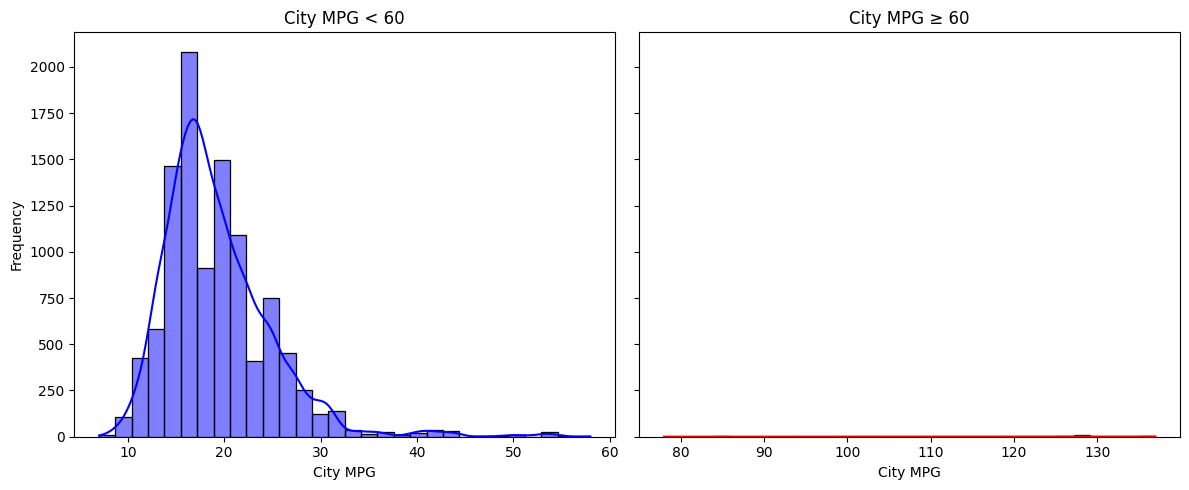

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df_n[df_n['city_mpg'] < 60]['city_mpg'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('City MPG < 60')
axes[0].set_xlabel('City MPG')
axes[0].set_ylabel('Frequency')

sns.histplot(df_n[df_n['city_mpg'] >= 60]['city_mpg'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title('City MPG ≥ 60')
axes[1].set_xlabel('City MPG')

plt.tight_layout()
plt.show()

### A bar chart showing the average MSRP for each category in Vehicle Size

<ipython-input-161-877fa77cd0ba>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_msrp = df_n.groupby('vehicle_size', as_index=False)['msrp'].mean()
<ipython-input-161-877fa77cd0ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vehicle_size', y= 'msrp', data=mean_msrp, palette='viridis')


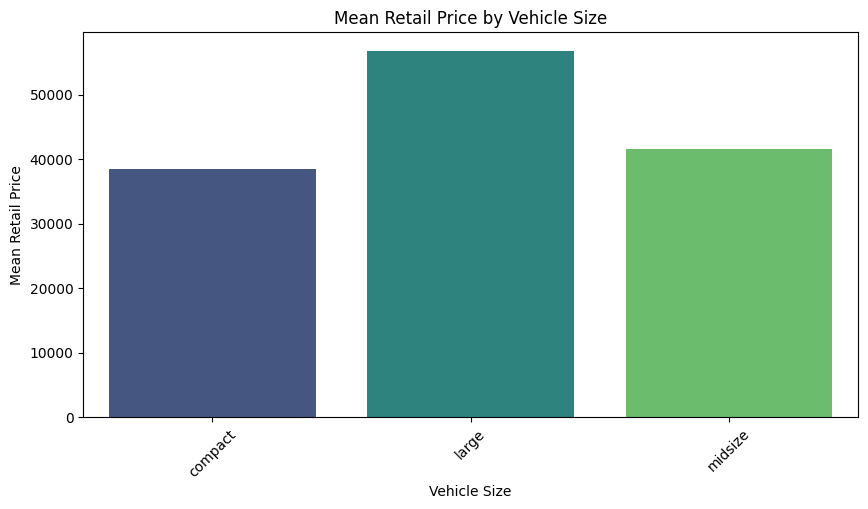

In [ ]:
mean_msrp = df_n.groupby('vehicle_size', as_index=False)['msrp'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x='vehicle_size', y= 'msrp', data=mean_msrp, palette='viridis')

plt.xlabel('Vehicle Size')
plt.ylabel('Mean Retail Price')
plt.title('Mean Retail Price by Vehicle Size')
plt.xticks(rotation=45)

plt.show()

### scatter plot showing the relationship between Engine HP and MSRP

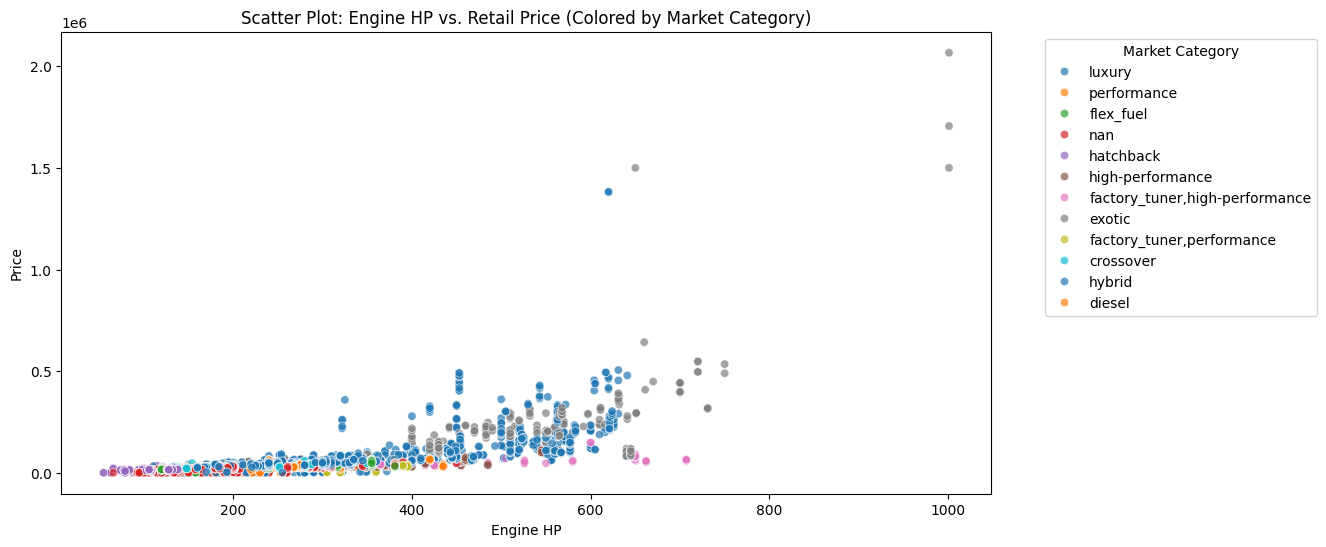

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_n['engine_hp'], y=df_n['msrp'], hue=df_n['market_category'], palette='tab10', alpha=0.7)

plt.xlabel('Engine HP')
plt.ylabel('Price')
plt.title('Scatter Plot: Engine HP vs. Retail Price (Colored by Market Category)')
plt.legend(title='Market Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### A boxplot showing the distribution of MSRP for each category in Driven_Wheels

<ipython-input-163-245c4358c83e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_n['driven_wheels'], y=df_n['msrp'], palette='Set2')


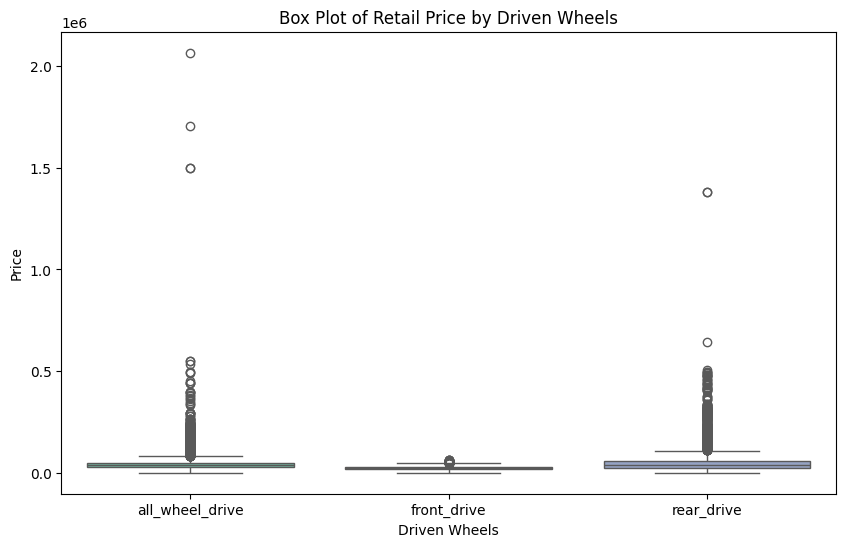

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_n['driven_wheels'], y=df_n['msrp'], palette='Set2')

plt.xlabel('Driven Wheels')
plt.ylabel('Price')
plt.title('Box Plot of Retail Price by Driven Wheels')

plt.show()

### A line plot showing trends in average city mpg and highway MPG for different Transmission Type

<ipython-input-164-e24dfbeb5ba0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_trend = df_n.groupby('driven_wheels', as_index=False)[['highway_mpg', 'city_mpg']].mean()


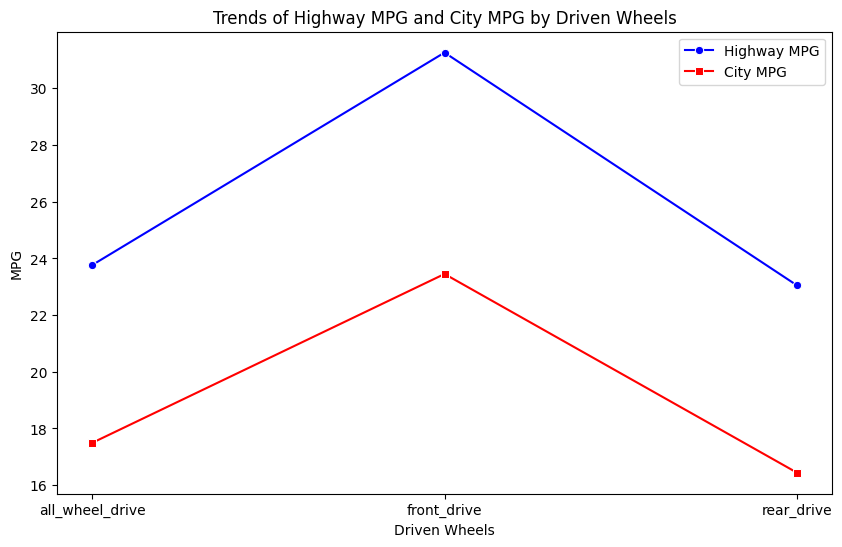

In [ ]:
df_trend = df_n.groupby('driven_wheels', as_index=False)[['highway_mpg', 'city_mpg']].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_trend['driven_wheels'], y=df_trend['highway_mpg'], marker='o', label='Highway MPG', color='blue')
sns.lineplot(x=df_trend['driven_wheels'], y=df_trend['city_mpg'], marker='s', label='City MPG', color='red')

plt.xlabel('Driven Wheels')
plt.ylabel('MPG')
plt.title('Trends of Highway MPG and City MPG by Driven Wheels')
plt.legend()
plt.show()

In [ ]:
# Normally, motorway fuel consumption is lower than in cities, in quite a similar proportion as it here

## **Correlation Analysis:**

### Investigate the correlation between the following variables:
Engine HP, MSRP, Popularity, city mpg and highway MPG

Correlation Matrix:
                 msrp  highway_mpg  city_mpg  engine_hp  popularity
msrp         1.000000    -0.236327 -0.225648   0.653363   -0.055994
highway_mpg -0.236327     1.000000  0.927276  -0.476743   -0.035245
city_mpg    -0.225648     0.927276  1.000000  -0.463687   -0.011890
engine_hp    0.653363    -0.476743 -0.463687   1.000000    0.035738
popularity  -0.055994    -0.035245 -0.011890   0.035738    1.000000


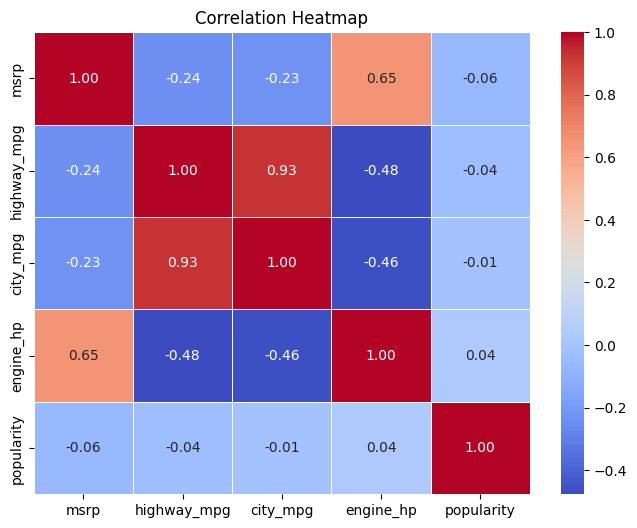

In [ ]:
corr_columns = ['msrp', 'highway_mpg', 'city_mpg', 'engine_hp', 'popularity']

corr_matrix = df_n[corr_columns].corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

# **Deliverables**

## **What trends exist in pricing (MSRP) and market size (Vehicle Size)?**

### How do MPG (city mpg and highway MPG) trends change with transmission type (Transmission Type)?

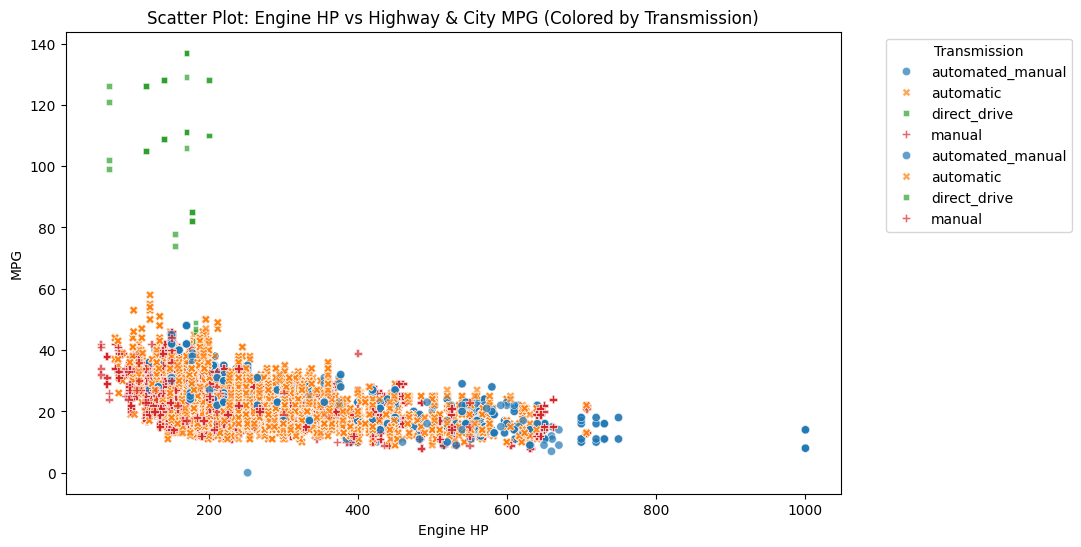

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=df_n['engine_hp'],
    y=df_n['highway_mpg'],
    hue=df_n['transmission'],
    style=df_n['transmission'],
    alpha=0.7,
    palette='tab10',
    marker='o',
)

sns.scatterplot(
    x=df_n['engine_hp'],
    y=df_n['city_mpg'],
    hue=df_n['transmission'],
    style=df_n['transmission'],
    alpha=0.7,
    palette='tab10',
    marker='s',
)

plt.xlabel('Engine HP')
plt.ylabel('MPG')
plt.title('Scatter Plot: Engine HP vs Highway & City MPG (Colored by Transmission)')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Usually, with an experienced driver - manual transmision should be slightly more economic, but newer generation automtatic transmisions are getting very close to those values. Exactly that is possible to see from that grath.**

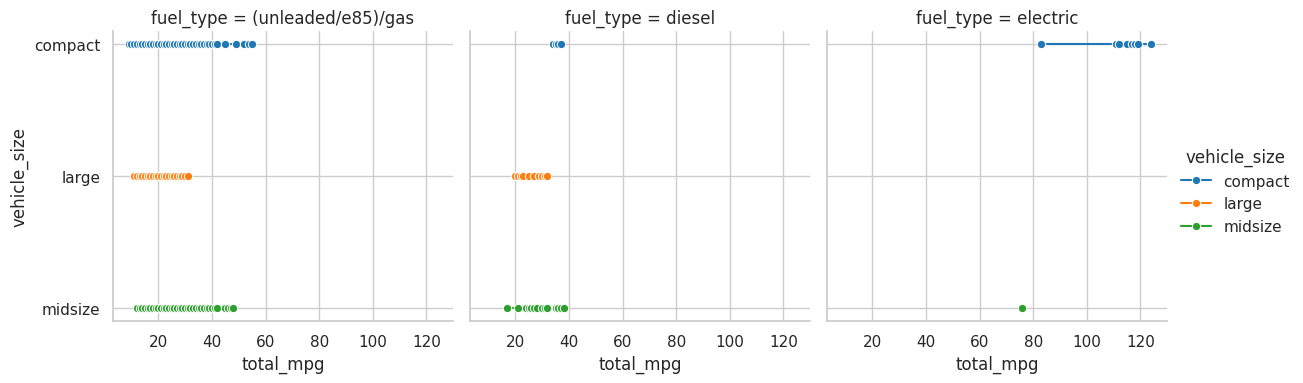

In [ ]:
g = sns.FacetGrid(df_filtered_sorted, col="fuel_type", hue="vehicle_size", palette="tab10", col_wrap=3, height=4)
g.map(sns.lineplot, "total_mpg", "vehicle_size", marker="o")
g.add_legend()
plt.show()

**from both graphs easier to conclude, that in a lot of cases bigger cars (for example delivery vans) are quite economical, when luxury small cars are very much fuel aggressive**

### How does horsepower (Engine HP) relate to price (MSRP)?

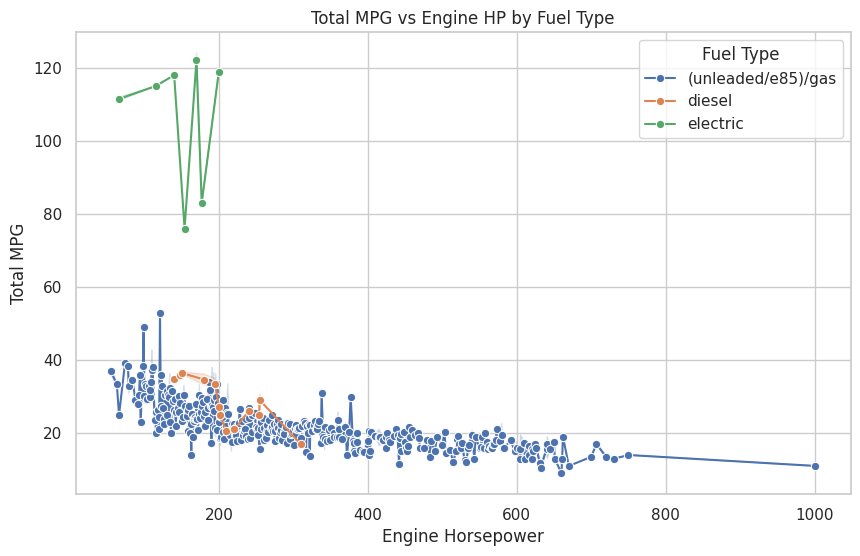

In [ ]:
df_n_filtered = df_n[df_n['fuel_type'] != 'Electric']

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_n_filtered,
    x='engine_hp',
    y='total_mpg',
    hue='fuel_type',
    marker='o'
)

plt.xlabel('Engine Horsepower')
plt.ylabel('Total MPG')
plt.title('Total MPG vs Engine HP by Fuel Type')
plt.legend(title='Fuel Type')

plt.show()

**this graph confirms the same information that diesel cars have lower spread in fuel consumption and luxury consumption often much higher amount of fuel**

### Is there a significant difference in price (MSRP) for different drivetrains (Driven_Wheels)?

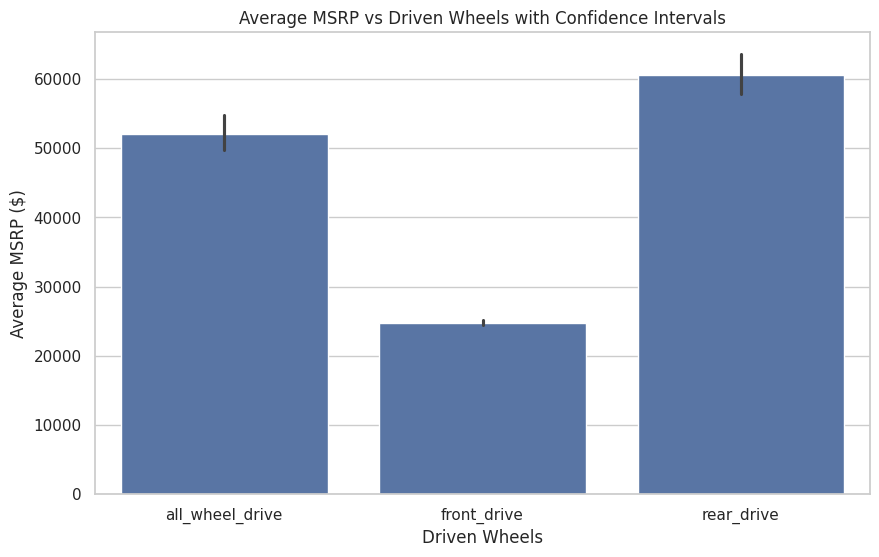

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_n,
    x='driven_wheels',
    y='msrp'
)

plt.xlabel('Driven Wheels')
plt.ylabel('Average MSRP ($)')
plt.title('Average MSRP vs Driven Wheels with Confidence Intervals')

plt.show()

**as it could be predicted, small and family cars are front drive - are the cheapest, further all wheel drive are cross country weakels**

### How do MPG (city mpg and highway MPG) trends change with transmission type (Transmission Type)?

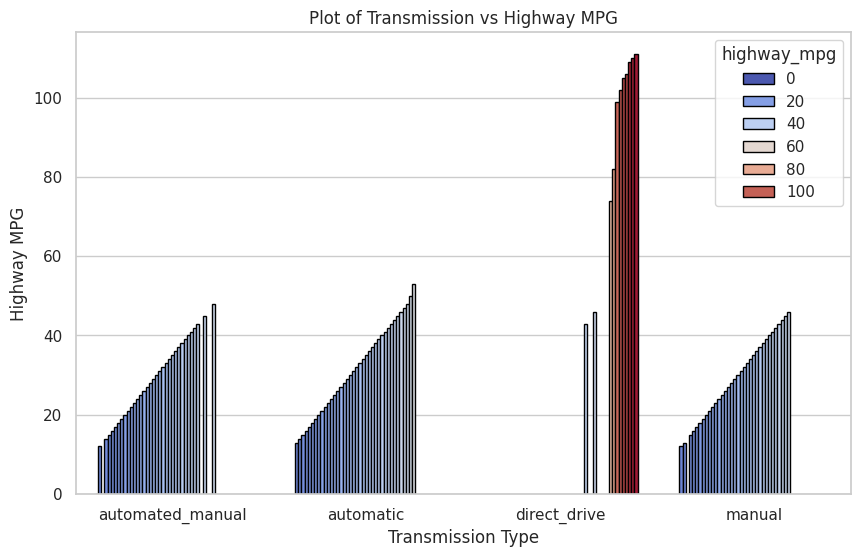

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_n,
    x='transmission',
    y='highway_mpg',
    hue='highway_mpg',
    palette='coolwarm',
    edgecolor='black'
)

plt.xlabel('Transmission Type')
plt.ylabel('Highway MPG')
plt.title('Plot of Transmission vs Highway MPG')

plt.show()

**once again in this educational data city and motorway fuel consumption changed places, but in general - direct_drive spred tends to be much higher than the rest of the presented transmission types**

## A short written summary (1-2 paragraphs) outlining:

### Insights derived from the analysis.

### Patterns or trends identified from visualizations.

Even that this education data is quite inconsistent, but at the same time quite chalenging and interesting. For example "Driving Wheel" reduction into a resonable data.
The general trand of the cars data - luxury cars are less fuel economical and much more expensive.

I am mechanical engineer by my original Bachelor Degree. In addition, I use to work "between jobs" as Scania and Iveco truck maintenance technition, also as Ocado delivery drive in London. I quite well imagine real fuel consamption destribution for different cars.
By my self my last 2 cars where Peugeot 307 (2L) in center London and Kia Picanto (1L) in Jerusalem area (mountians). Both cars were manual.
The transform formuler from L/km to MPG

MPG=
L/km
235.214
​



Actually, for my old 2L Peugeot fuel consumption was often only 10% higher than a new 1L Kia. The fuel consumption trand is quite complex.
Please, for the next time provide a more realistic data set.
It should be way more interesting to analise.

# Saved .csv file

In [ ]:
save_path = "/content/drive/MyDrive/MasterSchool/MasterSchool_Python/MasterSchool_Python_data/df_George_Shmelin_Cars.csv"

df_George_Shmelin_Cars.to_csv(save_path, index=False)

print(f"DataFrame saved successfully at: {save_path}")

DataFrame saved successfully at: /content/drive/MyDrive/MasterSchool/MasterSchool_Python/MasterSchool_Python_data/df_George_Shmelin_Cars.csv


https://drive.google.com/file/d/1-3kdtgXvwOarS6X_UOE-IRL47V_FCx1F/view?usp=drive_link